In [1]:
# Using the TMDB 5000 dataset from Kaggle and remove unwanted columns for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iso639 import Lang
import thinkstats2
import thinkplot
movies_df = pd.read_csv("movies.csv")
movies_df = movies_df.drop(['genres','homepage','id','keywords','original_title','overview'], axis=1)
movies_df = movies_df.drop(['production_companies','production_countries','spoken_languages','status','tagline'], axis=1)
movies_df = movies_df[['title','original_language','release_date','budget','revenue','runtime','popularity','vote_average','vote_count',]]
movies_df.rename(columns = {'vote_average':'rating', 'original_language':'language'}, inplace = True)
movies_df['language'] = movies_df['language'].apply(lambda x: Lang(x).name)
print(movies_df.head())

                                      title language release_date     budget  \
0                                    Avatar  English   12/10/2009  237000000   
1  Pirates of the Caribbean: At World's End  English    5/19/2007  300000000   
2                                   Spectre  English   10/26/2015  245000000   
3                     The Dark Knight Rises  English    7/16/2012  250000000   
4                               John Carter  English     3/7/2012  260000000   

      revenue  runtime  popularity  rating  vote_count  
0  2787965087    162.0  150.437577     7.2       11800  
1   961000000    169.0  139.082615     6.9        4500  
2   880674609    148.0  107.376788     6.3        4466  
3  1084939099    165.0  112.312950     7.6        9106  
4   284139100    132.0   43.926995     6.1        2124  


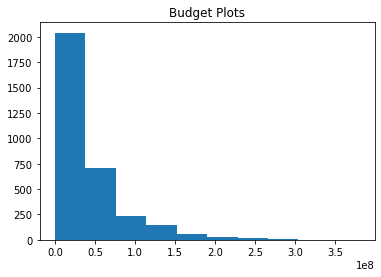

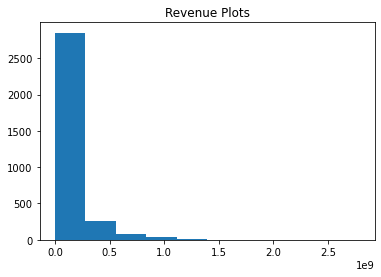

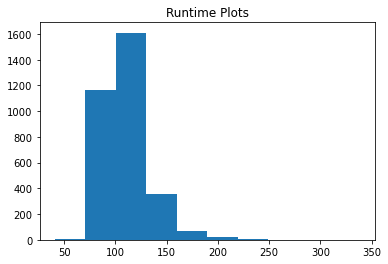

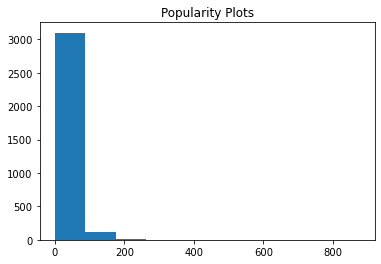

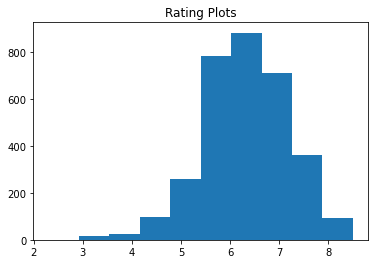

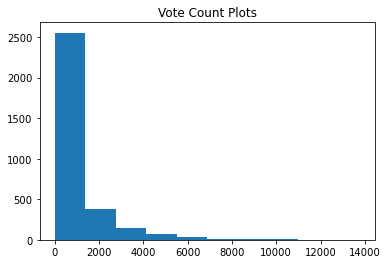

In [2]:
# Drop rows that have zero or NaN values and create Histograms for each numeric field
movies_df.release_date = movies_df.release_date.replace(0, np.nan)
movies_df.budget = movies_df.budget.replace(0, np.nan)
movies_df.revenue = movies_df.revenue.replace(0, np.nan)
movies_df.runtime = movies_df.runtime.replace(0, np.nan)
movies_df.popularity = movies_df.popularity.replace(0, np.nan)
movies_df.rating = movies_df.rating.replace(0, np.nan)
movies_df.vote_count = movies_df.vote_count.replace(0, np.nan)
movies_df = movies_df.dropna()
plt.hist(movies_df.budget)
plt.title("Budget Plots")
plt.show()
plt.hist(movies_df.revenue)
plt.title("Revenue Plots")
plt.show()
plt.hist(movies_df.runtime)
plt.title("Runtime Plots")
plt.show()
plt.hist(movies_df.popularity)
plt.title("Popularity Plots")
plt.show()
plt.hist(movies_df.rating)
plt.title("Rating Plots")
plt.show()
plt.hist(movies_df.vote_count)
plt.title("Vote Count Plots")
plt.show()

In [3]:
# Descriptive Characteristics of the numeric variables
print('Descriptive Characteristics of Budget')
print('Mean  : '+str(movies_df.budget.mean()))
print('Mode  : '+str(movies_df.budget.mode()))
print('Spread: '+str(movies_df.budget.var()))
print('Descriptive Characteristics of Revenue')
print('Mean  : '+str(movies_df.revenue.mean()))
print('Mode  : '+str(movies_df.revenue.mode()))
print('Spread: '+str(movies_df.revenue.var()))
print('Descriptive Characteristics of Runtime')
print('Mean  : '+str(movies_df.runtime.mean()))
print('Mode  : '+str(movies_df.runtime.mode()))
print('Spread: '+str(movies_df.runtime.var()))
print('Descriptive Characteristics of Popularity')
print('Mean  : '+str(movies_df.popularity.mean()))
print('Mode  : '+str(movies_df.popularity.mode()))
print('Spread: '+str(movies_df.popularity.var()))
print('Descriptive Characteristics of Rating')
print('Mean  : '+str(movies_df.rating.mean()))
print('Mode  : '+str(movies_df.rating.mode()))
print('Spread: '+str(movies_df.rating.var()))
print('Descriptive Characteristics of Vote Count')
print('Mean  : '+str(movies_df.vote_count.mean()))
print('Mode  : '+str(movies_df.vote_count.mode()))
print('Spread: '+str(movies_df.vote_count.var()))

Descriptive Characteristics of Budget
Mean  : 40678773.52835451
Mode  : 0    20000000.0
dtype: float64
Spread: 1971336469571451.8
Descriptive Characteristics of Revenue
Mean  : 121318095.80384257
Mode  : 0    8000000.0
dtype: float64
Spread: 3.472115730771378e+16
Descriptive Characteristics of Runtime
Mean  : 110.72079330647661
Mode  : 0    100.0
dtype: float64
Spread: 439.7561794076717
Descriptive Characteristics of Popularity
Mean  : 29.051491297799856
Mode  : 0         0.019984
1         0.031947
2         0.034259
3         0.037073
4         0.041651
           ...    
3222    434.278564
3223    481.098624
3224    514.569956
3225    724.247784
3226    875.581305
Length: 3227, dtype: float64
Spread: 1308.2589912199296
Descriptive Characteristics of Rating
Mean  : 6.3132630926557125
Mode  : 0    6.5
dtype: float64
Spread: 0.7394644574191941
Descriptive Characteristics of Vote Count
Mean  : 977.893089556864
Mode  : 0    210.0
dtype: float64
Spread: 2000919.1866447288


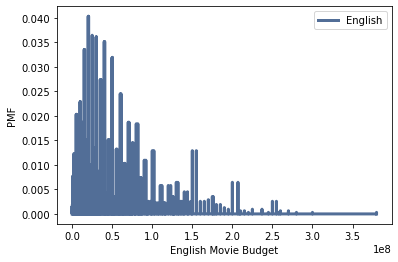

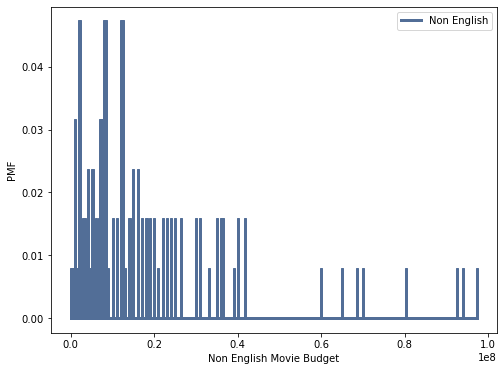

<Figure size 576x432 with 0 Axes>

In [4]:
# Using PMF we compare budget of English movies and non English movies
english_movies = movies_df[movies_df.language == 'English']
non_english_movies = movies_df[movies_df.language != 'English']
english_pmf = thinkstats2.Pmf(english_movies.budget, label="English")
non_english_pmf = thinkstats2.Pmf(non_english_movies.budget, label="Non English")
thinkplot.Pmf(english_pmf)
thinkplot.Show(xlabel='English Movie Budget', ylabel='PMF')
thinkplot.Pmf(non_english_pmf)
thinkplot.Show(xlabel='Non English Movie Budget', ylabel='PMF')

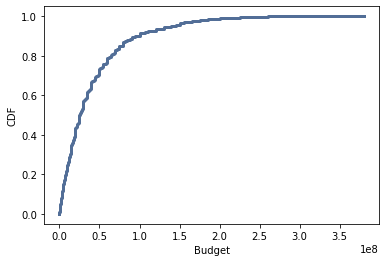

<Figure size 576x432 with 0 Axes>

In [5]:
# Create a CDF with the budget field
budget_cdf = thinkstats2.Cdf(movies_df.budget)
thinkplot.Cdf(budget_cdf)
thinkplot.Show(xlabel='Budget', ylabel='CDF')

Mean, Var, Sigma 39069972.29687006 1574876918018025.0 39684718.94845704


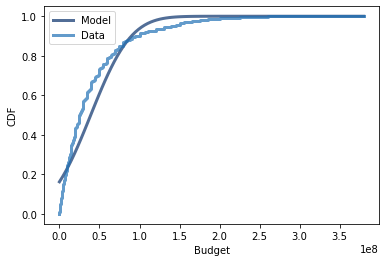

<Figure size 576x432 with 0 Axes>

In [6]:
# Plot Analytic Distribution
# Trim outliers
mu, var = thinkstats2.TrimmedMeanVar(movies_df.budget)
sigma = np.sqrt(var)
print('Mean, Var, Sigma', mu, var, sigma)
# Plot the model
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=380000000)
thinkplot.Plot(xs, ps, label='Model')
# Plot the data
budget_cdf = thinkstats2.Cdf(movies_df.budget, label='Data')
thinkplot.Cdf(budget_cdf) 
thinkplot.Show(xlabel='Budget', ylabel='CDF')

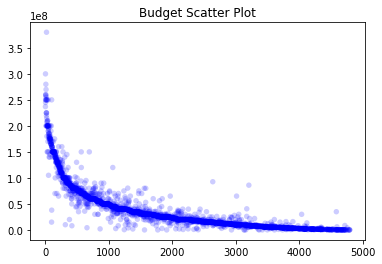

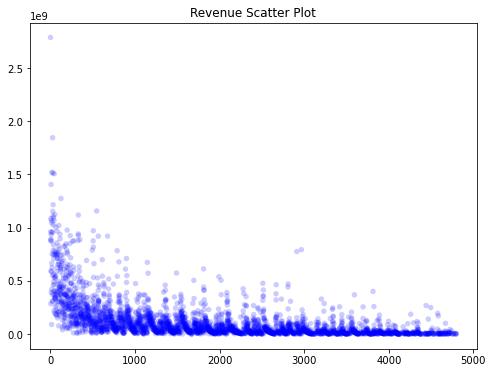

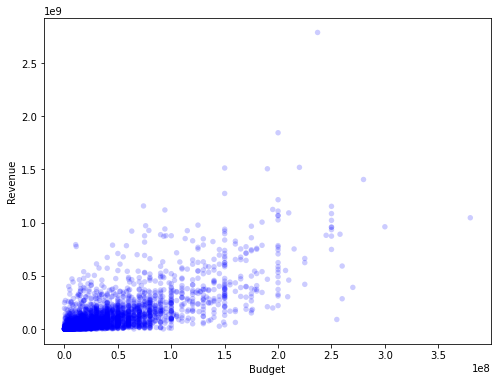

Pearson Correlation is 0.7053061820973975
Spearman Correlation is 0.6780595427183207


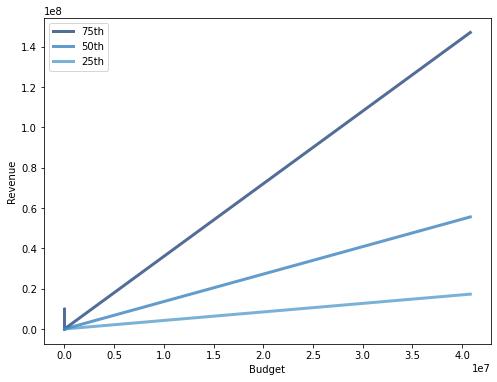

In [7]:
# Create Scatter Plots
thinkplot.Scatter(movies_df.budget)
thinkplot.Config(title="Budget Scatter Plot")
thinkplot.show()
thinkplot.Scatter(movies_df.revenue)
thinkplot.Config(title="Revenue Scatter Plot")
thinkplot.show()
thinkplot.Scatter(movies_df.budget, movies_df.revenue)
thinkplot.Config(xlabel="Budget", ylabel="Revenue")
thinkplot.show()
# Percentile Plot of Budget vs Revenue
bins = np.arange(10, 40, 2)
indices = np.digitize(movies_df.budget, bins)
groups = movies_df.groupby(indices)
budgets = [group.budget.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.revenue) for i, group in groups]
for percent in [75, 50, 25]:
    revenues = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent 
    thinkplot.Plot(budgets, revenues, label=label)
    thinkplot.Config(xlabel="Budget", ylabel="Revenue")
# Pearson and Spearman Correlations
print("Pearson Correlation is "+str(thinkstats2.Corr(movies_df.budget, movies_df.revenue)))
print("Spearman Correlation is "+str(thinkstats2.SpearmanCorr(movies_df.budget, movies_df.revenue)))

In [17]:
# Hypothesis Test
class DiffMeansPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data  
sample = thinkstats2.SampleRows(movies_df, 1048)
eng_df = sample[sample.language == 'English']
non_df = sample[sample.language != 'English']
data = eng_df.budget, non_df.budget
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print(pvalue)

0.001


In [9]:
# Regression Analysis
import statsmodels.formula.api as smf
formula = 'movies_df.revenue ~ movies_df.budget'
model = smf.ols(formula, data=movies_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      movies_df.revenue   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3192.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:56:44   Log-Likelihood:                -64920.
No. Observations:                3227   AIC:                         1.298e+05
Df Residuals:                    3225   BIC:                         1.299e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.082e+05   3.15e+06      0.288      0.773   -5.28e+06    7.09e+06
movies_df.budget     2.9600      0.052     56.501      0.000       2.857       3.063
==============================================================================
Omnibus:                     2525.922   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128770.597
Skew:                           3.275   Prob(JB):                         0.00
Kurtosis:                      33.246   Cond. No.                     8.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""